<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data

## Table of Contents

1. [Exective Summary](#exective-summary)
   
2. [Problem Statement](#problem-statement)
   
3. [Purpose](#purpose)

4. [Data](#data)

5. [Interpretation/Summary](#interpretation/summary)

## Exective Summary

This project involved building a regression model to predict housing prices at the close of sell based on various features such as the year it was built, the number of full bathrooms, and more. The model I built was trained on a dataset containing housing related varibles, and the goal is to predict the house prices accurately aithout knowing the actual price. The project also explores model evaluation, feature engineering, and the use of regularization techniques like Lasso to improve the accuracy of your prediction.

## Problem Statement

Housing prices are influenced by numerous factors such as the year it was built, the number of bedrooms, neighboorhoods, and more. The goal is to create a model that can predict the price of the houses based on these variables with high accuracy. Given the string of data and complexity to find the potential correlations between varibles, this problem involves both variable selection and the application of machine learning techniques to return accurate predictions.

## Purpose

The purpose of this project is to develop a regression model that predicts the price of a house using a set of data about the variables of the house. This model can be used to assist in predicting the price of the houses included, understanding trends in the real estate market, or as a byproduct for investors or real estate professionals looking at an estimated value based on various varibles.

--- 
## Part 1: Data(Setup) 

#### Imports and Data Read-In(s)
- Import the nessary libraries
- Read-In your dataset
  
---

In [111]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import statsmodels.api as sm

In [2]:
# Read-Ins
train = pd.read_csv('datasets/train.csv')

--- 
## Part 2: Data Munging(Analysing) 

#### Data Examining & Cleaning(Data Analysis)
- Load the data(View the first few rows for a dataset overview)
- Grammer check and outlay.(Snake_case any column names that are not.)
- Examine the data; consider whether discrete values are better represented as categorical or continuous.
- Check for missing values; and determine what missing values mean.
- Check for any obvious issues; Identify outliers.
- Drop/Add unnecessary rows(*Based on your judgement)
  
---

##### I want to use only the 'Everything Included for my first submission and then make the adjustments later after seeing how it performs when factoring in everthing. I will be adding codes so that my categorical data and continuous data can be read and tested.

##### Training Data Munging

In [3]:
train.shape

(2051, 81)

In [4]:
train.head();

In [5]:
train.columns = train.columns.str.replace(' ', '_').str.lower()

In [6]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [7]:
train.isnull().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

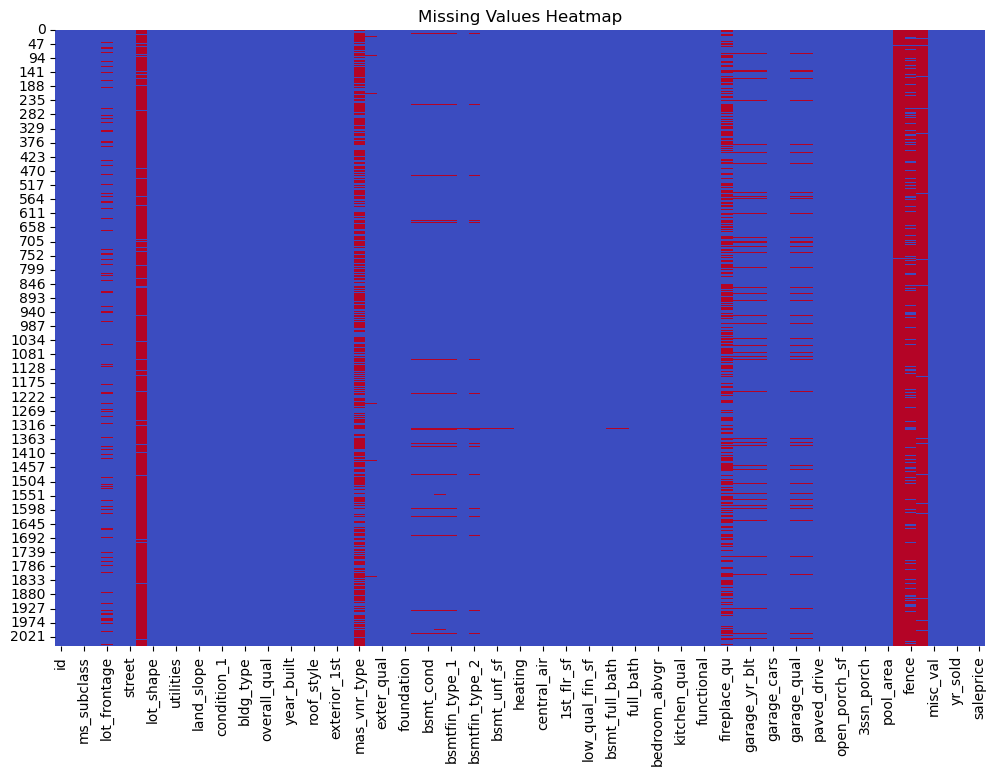

In [8]:
# Visualize and inspect missing values
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt 
plt.show()

# Plans to possibly drop lot_shape, mas_vnr_type, fireplace_qu, pool_area, fence, mis_val(Drop all other varibles that have missing data)

In [9]:
train.describe()

id           pid  ms_subclass  lot_frontage       lot_area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       overall_qual  overall_cond   year_built  year_remod/add  mas_vnr_area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  wood_deck_sf  open_porch_sf  enclosed_porch   3ssn_porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       screen_porch    pool_area      misc_val      mo_sold      yr_sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           saleprice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

---
## Part 3: Exploratory Data Analysis(EDA)
- Visualization of the data.(Distributions & correlations between the variables)
- Explore the data(View the relationships)
- Identify the variables that you believe to be good predictors of final sale price.
- Identify the X and y variables for the model
- Build dummy variables(*If required)
  
---

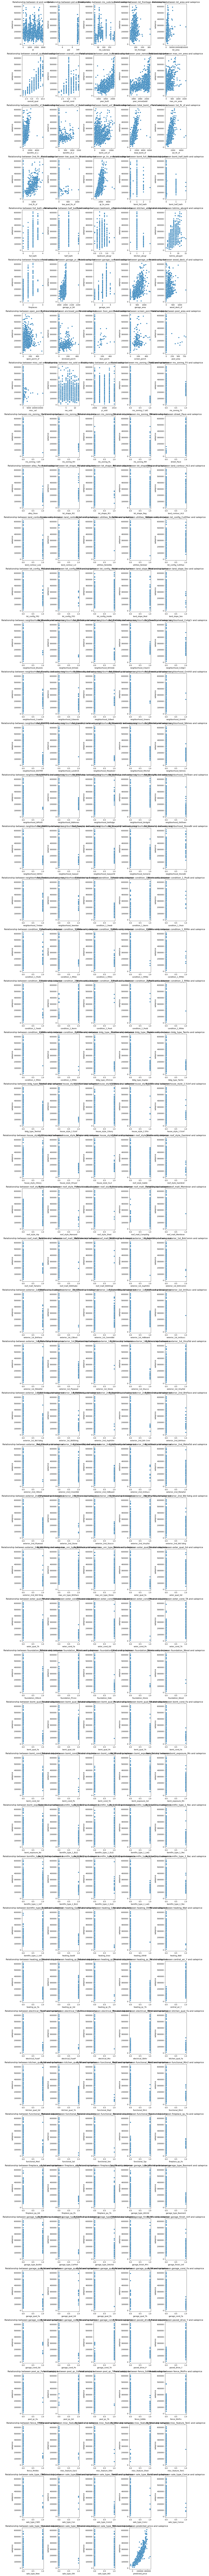

In [124]:
# Select independent variables (exclude target variable)
independent_vars = [col for col in train.columns if col != 'saleprice']

# Set the number of columns and calculate the number of rows
num_cols = 5
num_rows = len(independent_vars) // num_cols + (len(independent_vars) % num_cols > 0)

plt.figure(figsize=(14, num_rows * 4))

# Loop through each variable and create a scatter plot for correlation to 'saleprice'
for i, var in enumerate(independent_vars, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=train[var], y=train['saleprice'])
    plt.title(f'Relationship between {var} and saleprice')
    plt.xlabel(var)
    plt.ylabel('saleprice')

plt.tight_layout()
plt.show()

In [11]:
# Based on the charts above In the revised model I would want to look things variables that hav a highe min when moving to the right.(Listed Below)

# Identified as 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'bsmtfin_type_2', '2nd_flr_sf', 'full_bath', 'garage_area' and 'garage_cars'

In [12]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [13]:
# Missing values
si = SimpleImputer()
si_mean = SimpleImputer(strategy='mean')
si_frq = SimpleImputer(strategy='most_frequent')

In [14]:
independent_vars = ['garage_area', '2nd_flr_sf', 'year_remod/add', 'year_built', 'overall_qual', 'full_bath', 'garage_cars', 'ms_subclass', 'overall_cond', 'bsmt_unf_sf', 'totrms_abvgrd']

#Identify variables
X = train[independent_vars]
y = train['saleprice']


In [15]:
# Handle Missing Values
num_col = train.select_dtypes(include=['float64', 'int64']).columns
cat_col = train.select_dtypes(include=['object']).columns

train[num_col] = si_mean.fit_transform(train[num_col])
train[cat_col] = si_frq.fit_transform(train[cat_col])

In [16]:
# Encode Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(train[cat_col])

# Convert the encoded features back to a DataFrame for easier handling
cat_train = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_col))

In [17]:
#Concatenate the Dataframe
train = train.drop(columns=cat_col)
train = pd.concat([train[num_col], cat_train], axis=1) 

In [18]:
train.isnull().sum()

id                 0
pid                0
ms_subclass        0
lot_frontage       0
lot_area           0
                  ..
sale_type_ConLI    0
sale_type_ConLw    0
sale_type_New      0
sale_type_Oth      0
sale_type_WD       0
Length: 249, dtype: int64

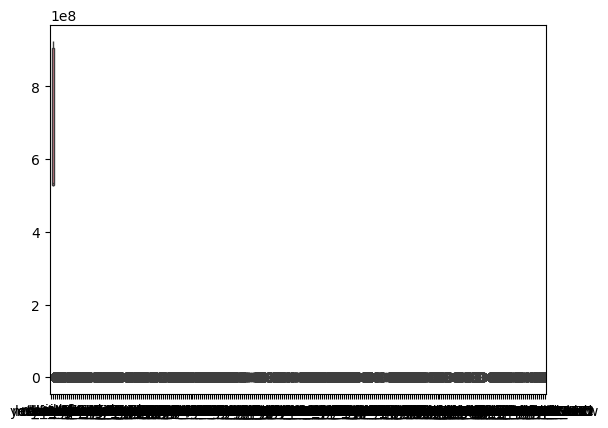

In [19]:
# Identifying Outliers
sns.boxplot(train);

# Not The best method as there is too much data.

In [20]:
train[num_col].corr()

id       pid  ms_subclass  lot_frontage  lot_area  \
id               1.000000  0.175793     0.026543     -0.023006  0.032872   
pid              0.175793  1.000000    -0.003632     -0.083615  0.024135   
ms_subclass      0.026543 -0.003632     1.000000     -0.364323 -0.245484   
lot_frontage    -0.023006 -0.083615    -0.364323      1.000000  0.389501   
lot_area         0.032872  0.024135    -0.245484      0.389501  1.000000   
overall_qual    -0.061483 -0.265863     0.035763      0.182459  0.105824   
overall_cond    -0.026096  0.106861    -0.070141     -0.049777 -0.019185   
year_built      -0.064444 -0.347039     0.035983      0.104661  0.036002   
year_remod/add  -0.090040 -0.176666     0.044836      0.079740  0.050771   
mas_vnr_area    -0.035351 -0.246650    -0.004035      0.200127  0.168742   
bsmtfin_sf_1    -0.045877 -0.086500    -0.060843      0.198451  0.215410   
bsmtfin_sf_2     0.000723 -0.013141    -0.068253      0.032764  0.041713   
bsmt_unf_sf      0.008555 -0.111253    -0.139885      0.118339  0.041180   
total_bsmt_sf   -0.038346 -0.203745    -0.225997      0.332854  0.277150   
1st_flr_sf      -0.022650 -0.145862    -0.246212      0.429211  0.381593   
2nd_flr_sf      -0.008388 -0.005598     0.305771      0.012274  0.029398   
low_qual_fin_sf  0.011719  0.072268     0.031091     -0.000284  0.001273   
gr_liv_area     -0.023881 -0.112936     0.068210      0.350425  0.327427   
bsmt_full_bath  -0.033385 -0.030538     0.025046      0.101798  0.115263   
bsmt_half_bath   0.014381 -0.001945    -0.017243     -0.028365  0.029757   
full_bath       -0.059086 -0.179370     0.142087      0.138849  0.125601   
half_bath       -0.042054 -0.163975     0.179404      0.032405  0.049995   
bedroom_abvgr    0.010605  0.009122    -0.003516      0.200617  0.139060   
kitchen_abvgr   -0.002400  0.068416     0.252111      0.014718 -0.013484   
totrms_abvgrd   -0.009092 -0.084999     0.034490      0.332602  0.238724   
fireplaces      -0.037560 -0.120710    -0.055118      0.225843  0.289467   
garage_yr_blt   -0.049245 -0.243816     0.079643      0.062607  0.004840   
garage_cars     -0.048656 -0.228307    -0.049147      0.280394  0.214953   
garage_area     -0.045192 -0.200838    -0.108226      0.338862  0.263294   
wood_deck_sf    -0.009045 -0.041221     0.001622      0.101366  0.155623   
open_porch_sf    0.001382 -0.081129    -0.020289      0.170315  0.140864   
enclosed_porch   0.033747  0.150179    -0.039842     -0.003030  0.014139   
3ssn_porch      -0.022791 -0.024679    -0.030088      0.028592  0.019553   
screen_porch     0.009758 -0.042030    -0.038819      0.068031  0.067714   
pool_area        0.055696  0.005825    -0.004585      0.141304  0.115102   
misc_val        -0.012683  0.004223    -0.027485      0.048344  0.093922   
mo_sold          0.127723 -0.032735     0.013027     -0.016011  0.003197   
yr_sold         -0.975747  0.008476    -0.032870      0.008396 -0.029454   
saleprice       -0.051398 -0.255052    -0.087335      0.325850  0.296566   

                 overall_qual  overall_cond  year_built  year_remod/add  \
id                  -0.061483     -0.026096   -0.064444       -0.090040   
pid                 -0.265863      0.106861   -0.347039       -0.176666   
ms_subclass          0.035763     -0.070141    0.035983        0.044836   
lot_frontage         0.182459     -0.049777    0.104661        0.079740   
lot_area             0.105824     -0.019185    0.036002        0.050771   
overall_qual         1.000000     -0.082770    0.602964        0.584654   
overall_cond        -0.082770      1.000000   -0.370988        0.042614   
year_built           0.602964     -0.370988    1.000000        0.629116   
year_remod/add       0.584654      0.042614    0.629116        1.000000   
mas_vnr_area         0.435988     -0.135520    0.327649        0.210327   
bsmtfin_sf_1         0.278593     -0.045749    0.275392        0.166573   
bsmtfin_sf_2        -0.028184      0.047791   -0.021028       -0.057126   
bsmt_un

---
## Part 4: Build The Model
- Code in the X and y variables
- Slit the data
- Instantiate the Model
- Fit the model

---

In [21]:
independent_vars = ['garage_area', '2nd_flr_sf', 'year_remod/add', 'year_built', 'overall_qual', 'full_bath', 'garage_cars', 'ms_subclass', 'overall_cond', 'bsmt_unf_sf', 'totrms_abvgrd']

# Label the variables
X = train[independent_vars]
y = train['saleprice']

In [63]:
# Split The Data into TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate the Model and Fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---
## Part 5: Evaluate The Model(Training set)
- Make Predictions
- Evaluate the performance of the model
  
---

In [23]:
# Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

#Evaluate the model
print("Model R^2 Score:", r2_score(y_test, y_pred))
print("Model Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Model Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Model R^2 Score: 0.7709135607287316
Model Mean Squared Error: 1406596402.504458
Model Mean Absolute Error: 27642.274759568343


In [24]:
train['predicted_price'] = model.predict(X)

In [25]:
preds = train['predicted_price']

In [26]:
train.head()

id          pid  ms_subclass  lot_frontage  lot_area  overall_qual  \
0  109.0  533352170.0         60.0       69.0552   13517.0           6.0   
1  544.0  531379050.0         60.0       43.0000   11492.0           7.0   
2  153.0  535304180.0         20.0       68.0000    7922.0           5.0   
3  318.0  916386060.0         60.0       73.0000    9802.0           5.0   
4  255.0  906425045.0         50.0       82.0000   14235.0           6.0   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  \
0           8.0      1976.0          2005.0         289.0  ...   
1           5.0      1996.0          1997.0         132.0  ...   
2           7.0      1953.0          2007.0           0.0  ...   
3           5.0      2006.0          2007.0           0.0  ...   
4           8.0      1900.0          1993.0           0.0  ...   

   misc_feature_TenC  sale_type_CWD  sale_type_Con  sale_type_ConLD  \
0                0.0            0.0            0.0              0.0   
1                0.0            0.0            0.0              0.0   
2                0.0            0.0            0.0              0.0   
3                0.0            0.0            0.0              0.0   
4                0.0            0.0            0.0              0.0   

   sale_type_ConLI  sale_type_ConLw  sale_type_New  sale_type_Oth  \
0              0.0              0.0            0.0            0.0   
1              0.0              0.0            0.0            0.0   
2              0.0              0.0            0.0            0.0   
3              0.0              0.0            0.0            0.0   
4              0.0              0.0            0.0            0.0   

   sale_type_WD   predicted_price  
0            1.0    188663.525674  
1            1.0    243594.790672  
2            1.0    129046.455779  
3            1.0    170481.679675  
4            1.0    161918.504755  

[5 rows x 250 columns]

In [27]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df

Actual      Predicted
1124  132500.0  144732.202681
188   226000.0  222692.492768
1727  250000.0  299817.542934
1658  128000.0  118302.446793
1424  203160.0  228184.544654
...        ...            ...
572   130000.0  155251.531975
548   114000.0   94651.186112
530   119900.0  132473.750080
445   124000.0   84191.791713
693   235128.0  274118.590498

[513 rows x 2 columns]

## Part 5(2): Evaluate The Model(Unseen Data)
- Load a new dataset
- Munge new dataset
- Evaluate performance

In [28]:
test = pd.read_csv('datasets/test.csv')

In [29]:
test.head();

In [30]:
test.columns = test.columns.str.replace(' ', '_').str.lower()

In [31]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  fence misc_feature misc_val mo_sold  yr_sold  sale_type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [32]:
test.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_feature     object
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
Length: 80, dtype: object

In [33]:
targ_columns = [
    'garage_area', '2nd_flr_sf', 'year_remod/add', 'year_built', 
    'overall_qual', 'full_bath', 'garage_cars', 'ms_subclass', 
    'overall_cond', 'bsmt_unf_sf', 'totrms_abvgrd'
]
# Select only columns present in both `test` and `targ_columns from train df`
available_columns = [col for col in targ_columns if col in test.columns]
test_filt= test[available_columns]
print(test_filt.head())

   garage_area  2nd_flr_sf  year_remod/add  year_built  overall_qual  \
0          440        1020            1950        1910             6   
1          580           0            1977        1977             5   
2          426         832            2006        2006             7   
3          480           0            2006        1923             5   
4          514           0            1963        1963             6   

   full_bath  garage_cars  ms_subclass  overall_cond  bsmt_unf_sf  \
0          2            1          190             8         1020   
1          2            2           90             4         1967   
2          2            2           60             5          100   
3          1            2           30             6          968   
4          1            2           20             5          785   

   totrms_abvgrd  
0              9  
1             10  
2              7  
3              5  
4              6  


In [34]:
test_filt = test.copy()

In [35]:
test_filt['saleprice'] = train['saleprice'].mean()

In [36]:
test_filt['saleprice']

0      181469.701609
1      181469.701609
2      181469.701609
3      181469.701609
4      181469.701609
           ...      
873    181469.701609
874    181469.701609
875    181469.701609
876    181469.701609
877    181469.701609
Name: saleprice, Length: 878, dtype: float64

In [37]:
test_filt.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0  Grvl       Reg          Lvl  ...            0         0     NaN   NaN   
1   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
3   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
4   NaN       IR1          Lvl  ...          185         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type      saleprice  
0          NaN        0       4    2006        WD   181469.701609  
1          NaN        0       8    2006        WD   181469.701609  
2          NaN        0       9    2006        New  181469.701609  
3          NaN        0       7    2007        WD   181469.701609  
4          NaN        0       7    2009        WD   181469.701609  

[5 rows x 81 columns]

In [38]:
numeric_features = ['garage_area', '2nd_flr_sf', 'year_remod/add', 'year_built', 'overall_qual', 
                    'full_bath', 'garage_cars', 'ms_subclass', 'overall_cond', 'bsmt_unf_sf', 'totrms_abvgrd']
categorical_features = [] 

In [39]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)])

In [40]:
X_transformed = column_transformer.fit_transform(X)

In [41]:
model = LinearRegression()
model.fit(X_transformed, y)

LinearRegression()

In [42]:
test_filter = test[targ_columns]

In [43]:
new_data_transformed = column_transformer.transform(test_filter)

In [44]:
predictions = model.predict(new_data_transformed)
print(predictions)

[152006.10168609 171521.25853924 230570.56544004 123252.98418064
 169175.68268277  66432.25413173  93986.08995766 117197.34492396
 162483.99161148 190512.78854695 153849.09282449 137784.08570539
 139272.79278715 269632.75007676 170442.4826129  155990.07224566
 186879.51737652 112545.10629601 184311.98819158 222386.08944139
 146259.63052289 154269.36773142 164141.08935462 151218.68742356
 217472.92423394 129020.80436165 112754.75773112 121400.99824608
 165955.15118989  17102.50264532 109878.95163169  90123.5561291
 214536.46721197 146816.27192811 219842.19153521 212861.51594943
 106279.93762933 103827.92805717 140437.48580538 210859.66308657
 148017.1082458  248255.87530579 171487.05695017 142532.27430904
 190488.49415797  60864.51124934 224462.18608337 135726.39636162
 117520.5832316  123279.58096817  99527.78293465 251687.92895706
 279064.4278686  118650.21082016 115377.18405433 178202.4106089
 191178.0452053  151628.58548935 203715.99559847 254665.98058153
 278044.36054908  95779.137

In [45]:
test['predicted_saleprice'] = predictions

In [46]:
test_filter['predicted_saleprice'] = predictions

/var/folders/pk/z58dkjgn50153_74d2055v0r0000gn/T/ipykernel_10020/1007599647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filter['predicted_saleprice'] = predictions


In [47]:
#For Kaggle

predictionz = test.copy()

predictionz['saleprice'] = predictions

In [48]:
predictionz = test[['id', 'predicted_saleprice']].set_index('id')

In [49]:
predictionz.head()
predictionz.to_csv('datasets/kaggle_submission.csv')

In [50]:
test_filter.head()

garage_area  2nd_flr_sf  year_remod/add  year_built  overall_qual  \
0          440        1020            1950        1910             6   
1          580           0            1977        1977             5   
2          426         832            2006        2006             7   
3          480           0            2006        1923             5   
4          514           0            1963        1963             6   

   full_bath  garage_cars  ms_subclass  overall_cond  bsmt_unf_sf  \
0          2            1          190             8         1020   
1          2            2           90             4         1967   
2          2            2           60             5          100   
3          1            2           30             6          968   
4          1            2           20             5          785   

   totrms_abvgrd  predicted_saleprice  
0              9        152006.101686  
1             10        171521.258539  
2              7        230570.565440  
3              5        123252.984181  
4              6        169175.682683

In [51]:
test_filter.to_csv('datasets/test_w_predictions.csv', index=False)

---
## Part 6: Interpret The Results
- Check to see how well the model performs.
- Based on the model and the output interpret what it means.

---

##### |The model did perform decent the first time around as 77% of the variance in the saleprice; which was acceptable to me as it was my first model that I built but I feel that it could perform better.

#### Bonus

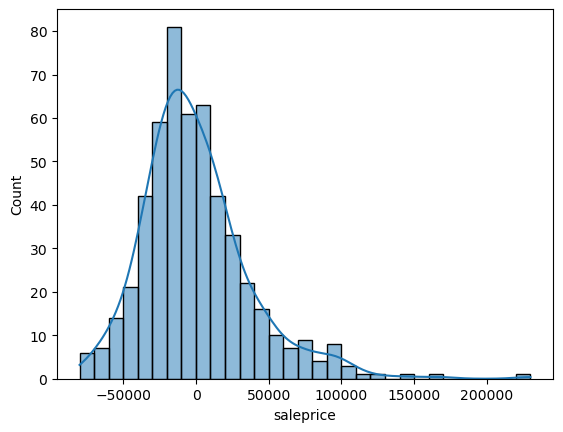

In [52]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

In [53]:
model.coef_

array([ 7.26908498e+01, -4.98096169e+00,  2.36492333e+02,  2.33151209e+02,
        2.89197684e+04,  8.19236544e+03, -3.46536665e+02, -2.03631361e+02,
        1.25922863e+03, -1.62884618e+01,  1.16166897e+04])

In [54]:
X_train_si = si.fit_transform(X_train)

X_val_si = si.transform(X_test)

model.fit(X_train_si, y_train)

LinearRegression()

In [55]:
model.score(X_train_si, y_train)

0.7527818867901969

In [56]:
model.score(X_val_si, y_test)

0.7709135607287316

In [57]:
model.fit(X,y)

LinearRegression()

In [60]:
model.score(X,y)

0.7580058675299928

In [58]:
#Baseline Model Comparison
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)
print("Baseline R^2 Score:", r2_score(y_test, y_dummy_pred))
print("Baseline Mean Squared Error:", mean_squared_error(y_test, y_dummy_pred))
print("Baseline Mean Absolute Error:", mean_absolute_error(y_test, y_dummy_pred))

Baseline R^2 Score: -0.00043273813883448753
Baseline Mean Squared Error: 6142681753.185111
Baseline Mean Absolute Error: 59200.15851324599


In [59]:
X_train_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_const).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     422.4
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:40:43   Log-Likelihood:                -18462.
No. Observations:                1538   AIC:                         3.695e+04
Df Residuals:                    1526   BIC:                         3.701e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.102e+06   1.31e+05     -8.

---
## Part 7: Model Iterations(After First Model Is Created)
- Adjust the model accordingly. Then calculate the scores and submit 

---

Use: 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'bsmtfin_type_2', '2nd_flr_sf', 'full_kitchen', 'garage_area' and 'garage_cars'

In [73]:
from sklearn.preprocessing import StandardScaler
independent_varz = ['overall_qual', 'overall_cond', 'year_built', 'year_remod/add', '2nd_flr_sf', 'full_bath', 'garage_area', 'garage_cars']

# Label the variables
X = train[independent_varz]
y = train['saleprice']

In [112]:
X_tran, X_val, y_tran, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

#scale standarize the features
scaler = StandardScaler()
X_tran_scale = scaler.fit_transform(X_tran)
X_val_scale = scaler.transform(X_val)

lm = Lasso(alpha=0.1)
lm.fit(X_tran_scale, y_train)

# Instantiate the Model and Fit
lr = LinearRegression()
lr.fit(X_tran_scale, y_tran)

LinearRegression()

In [113]:
#Lasso 
y_predl = lm.predict(X_val_scale)

In [120]:
mse = mean_squared_error(y_val, y_predl)
r2 = lm.score(X_val_scale, y_val)
print(mse)
print(r2)

1534797402.6182616
0.750034003113772


In [121]:
# Make Predictions and Evaluate the Model
y_pred = lr.predict(X_val_scale
#Evaluate the model
print("Model R^2 Score:", r2_score(y_val, y_pred))
print("Model Mean Squared Error:", mean_squared_error(y_val, y_pred))
print("Model Mean Absolute Error:", mean_absolute_error(y_val, y_pred))

Model R^2 Score: 0.7500340246824193
Model Mean Squared Error: 1534797270.1862338
Model Mean Absolute Error: 28423.027612776878


In [86]:
train_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred 
})

In [89]:
train_df['Error'] = train_df['Actual'] - train_df['Predicted']
train_df.head()

Actual      Predicted         Error
1124  132500.0  144604.966352 -12104.966352
188   226000.0  217966.462320   8033.537680
1727  250000.0  278194.480715 -28194.480715
1658  128000.0  135284.276115  -7284.276115
1424  203160.0  236661.600538 -33501.600538

Now put it on the test data

In [94]:
targ_columns = [
    'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', '2nd_flr_sf', 'full_bath', 'garage_area', 'garage_cars'
]
# Select only columns present in both `test` and `targ_columns from train df`
available_columns = [col for col in targ_columns if col in test.columns]
test_filti = test[available_columns]
print(test_filti.head())

   overall_qual  overall_cond  year_built  year_remod/add  2nd_flr_sf  \
0             6             8        1910            1950        1020   
1             5             4        1977            1977           0   
2             7             5        2006            2006         832   
3             5             6        1923            2006           0   
4             6             5        1963            1963           0   

   full_bath  garage_area  garage_cars  
0          2          440            1  
1          2          580            2  
2          2          426            2  
3          1          480            2  
4          1          514            2  


In [91]:
numeric_features = ['overall_qual', 'overall_cond', 'year_built', 'year_remod/add', '2nd_flr_sf', 'full_bath', 'garage_area', 'garage_cars']
categorical_features = [] 

In [92]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)])
X_transformer = column_transformer.fit_transform(X)

In [93]:
lr = LinearRegression()
lr.fit(X_transformer, y)

LinearRegression()

In [95]:
test_filtr = test[targ_columns]
new_data_transformed = column_transformer.transform(test_filtr)

In [96]:
predicts = lr.predict(new_data_transformed)
print(predicts)

[176511.13588216 158765.29379847 221332.22554703 135407.85298844
 165242.57236144  93284.44081782  94114.57761226 119829.58284379
 236462.27420899 181291.28469317 185075.14454157 149125.3093323
 156352.51106004 292925.88487963 149263.56584132 118181.86889341
 210867.9802449  116571.61306201 176184.86547618 222071.20587579
 123914.28294954 157714.76461013 190605.05255028 169620.85391063
 216153.57632436 125949.62028865 109608.31047102 109513.4765352
 165203.28335183  23878.71488336 126513.57969293 100787.73336527
 238889.49980036 137596.63108803 229808.90159291 224373.22501852
  74847.25724027  99257.32091897 133270.32099132 231000.56474917
 200498.88228828 220393.89694189 153829.9432646  121429.29614076
 217799.02869877  71308.17974055 237870.94803037 115493.68208445
 124080.7847837  115647.19863585  97489.05093435 275937.01646006
 286105.19584531 123055.34748055 111968.29938296 170837.51739403
 182646.74213324 135307.06807523 211868.63220316 259842.07419121
 290473.53204117 114624.241

In [109]:
test_filtr['predicted_saleprice'] = predicts
test['predictd_salesprice'] = predicts

/var/folders/pk/z58dkjgn50153_74d2055v0r0000gn/T/ipykernel_10020/2910136207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtr['predicted_saleprice'] = predicts


In [110]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour  ... pool_area pool_qc fence misc_feature  \
0  Grvl       Reg          Lvl  ...         0     NaN   NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
2   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   
3   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   

  misc_val mo_sold yr_sold sale_type  predicted_saleprice  predictd_salesprice  
0        0       4    2006       WD         152006.101686        176511.135882  
1        0       8    2006       WD         171521.258539        158765.293798  
2        0       9    2006       New        230570.565440        221332.225547  
3        0       7    2007       WD         123252.984181        135407.852988  
4        0       7    2009       WD         169175.682683        165242.572361  

[5 rows x 82 columns]

In [98]:
test_filtr.head()

overall_qual  overall_cond  year_built  year_remod/add  2nd_flr_sf  \
0             6             8        1910            1950        1020   
1             5             4        1977            1977           0   
2             7             5        2006            2006         832   
3             5             6        1923            2006           0   
4             6             5        1963            1963           0   

   full_bath  garage_area  garage_cars  predicted_saleprice  
0          2          440            1        176511.135882  
1          2          580            2        158765.293798  
2          2          426            2        221332.225547  
3          1          480            2        135407.852988  
4          1          514            2        165242.572361

In [107]:
predictz = test[['id', 'predictd_salesprice']].set_index('id')
predictz.head()

predictd_salesprice
id                       
2658        176511.135882
2718        158765.293798
2414        221332.225547
1989        135407.852988
625         165242.572361

In [108]:
predictz.to_csv('datasets/kaggle_submission_scaled.csv')

## Interpretation/ Summary

After getting a model built I tried making extra changes like scaling my data and I was still in the 70% range when it came to the varience being explained. I think yiu would need to add more complex changes like polynomials to get a better working model.